### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix #for checking the model accuracy


import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [2]:
data = pd.read_csv("dataset/weather.csv")

### Analysing the data

In [3]:
data.info() # Getting all teh requirent information of features in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
data.shape

(145460, 23)

- **We have 145460 records and 23 features in the dataset.**
- **we have some nan values in the data which need to be processed before training.**
- **Some of the features in the data is of categorical type we need to convert those into int for better usage.**

In [5]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

- **We have nan's in almost every feature. We need to process those before training the model.**

In [6]:
data.head(2) # Lets see the sample of data with 2 records

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


### Lets drop the Date feature from the dataset

In [7]:
data.drop(['Date'], axis=1, inplace=True)

### Treating the Nan values in dataset

- **We have nan's in almost every features of dataset.**
- **Before replacing this values we need to analyse the feature to use the best method to replace.**
- **Even the target variable and most important feature "RainToday" has nan values in them.**
- **If we relace this values with some data then the model may not perform better.**
- **So, We are removing the records with nan's in this feature and procecss the remaining data.**

In [8]:
# Lets remove the records in data with nan's in "RainToday", "RainTomorrow"
data=data.dropna(subset=['RainTomorrow','RainToday'])

In [9]:
data.isna().sum()

Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [10]:
data.shape

(140787, 22)

- **We can observe that the records in the data is reduced because we removed the records with nan values in target variable and "RainToday" feature.**

In [11]:
categorical_features=data.select_dtypes(include=[np.object])
float_features=data.select_dtypes(include=[np.float])
list(float_features.columns)

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [12]:
# Lets replace all the features with float type using mean
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(data[list(float_features.columns)])
data[list(float_features.columns)]=imputer.transform(data[list(float_features.columns)])

In [13]:
# Lets replace all the features with object type using mode
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow']=data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [14]:
data.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

- **All the nan values in the data is now trated and replaced with the most suitable value.**

In [15]:
for c in categorical_features:
    le = LabelEncoder() 
    data[c] = le.fit_transform(list(data[c].values))

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  int64  
 1   MinTemp        140787 non-null  float64
 2   MaxTemp        140787 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    140787 non-null  float64
 5   Sunshine       140787 non-null  float64
 6   WindGustDir    140787 non-null  int64  
 7   WindGustSpeed  140787 non-null  float64
 8   WindDir9am     140787 non-null  int64  
 9   WindDir3pm     140787 non-null  int64  
 10  WindSpeed9am   140787 non-null  float64
 11  WindSpeed3pm   140787 non-null  float64
 12  Humidity9am    140787 non-null  float64
 13  Humidity3pm    140787 non-null  float64
 14  Pressure9am    140787 non-null  float64
 15  Pressure3pm    140787 non-null  float64
 16  Cloud9am       140787 non-null  float64
 17  Cloud3pm       140787 non-nul

- **Now we can see that all the nan values are treated and all the features of of datatype "int" (or) "float".**

In [17]:
data['Sunshine'].value_counts()

7.63054     66805
0.00000      2299
10.70000     1083
11.00000     1077
10.80000     1057
            ...  
14.00000       15
14.10000        6
14.30000        4
14.20000        2
14.50000        1
Name: Sunshine, Length: 146, dtype: int64

### Visualizing some feature

Text(0.5, 1.0, 'Evaporation')

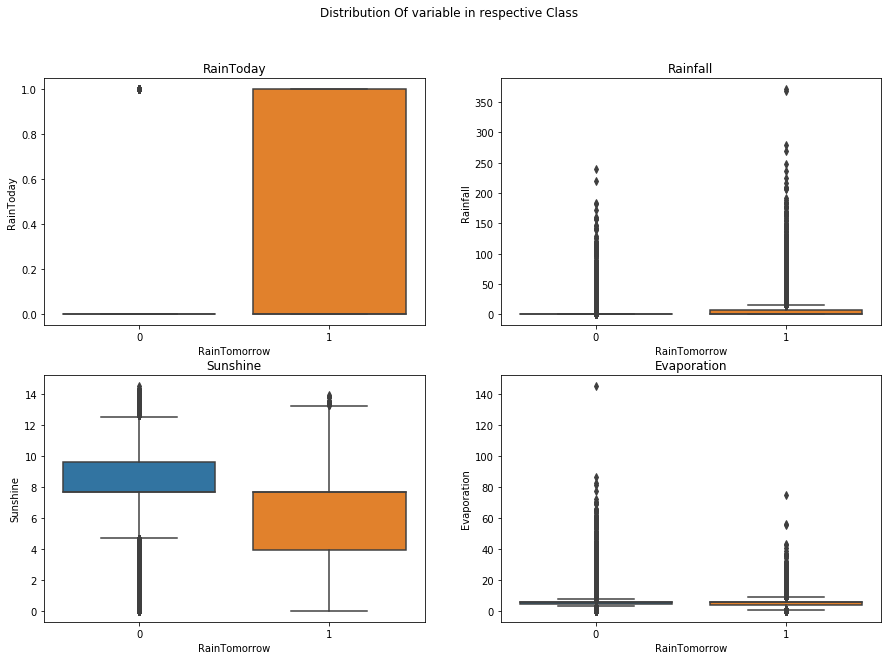

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution Of variable in respective Class')
sns.boxplot(ax=axes[0, 0], x='RainTomorrow',y="RainToday",data=data)
axes[0, 0].set_title("RainToday")
sns.boxplot(ax=axes[0, 1], x='RainTomorrow',y="Rainfall",data=data)
axes[0, 1].set_title("Rainfall")
sns.boxplot(ax=axes[1, 0], x='RainTomorrow',y="Sunshine",data=data)
axes[1, 0].set_title("Sunshine")
sns.boxplot(ax=axes[1, 1], x='RainTomorrow',y="Evaporation",data=data)
axes[1, 1].set_title("Evaporation")

- **We can see the distribution of different feature w.r.t target feature.**
- **We can understand from the plots that there are outliars in the dataset.**
- **We need to handle these outlier to reduce their importance in model training.**

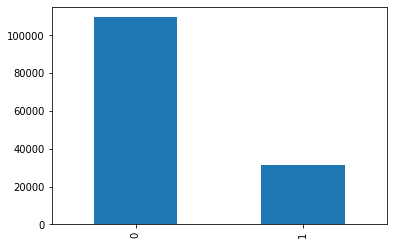

In [19]:
data["RainTomorrow"].value_counts().plot(kind='bar')

- **We can see that the dataset is not balanced and the distribution of "0" class is more than 70% of data.**

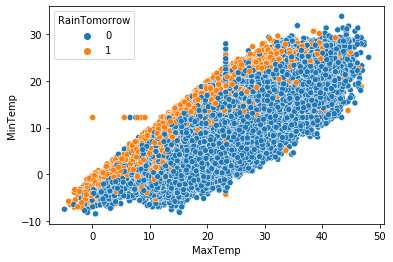

In [20]:
sns.scatterplot(x="MaxTemp", y="MinTemp", hue="RainTomorrow", data=data)

- **This plot describes the distribution of MaxTemp and MinTemp features.**

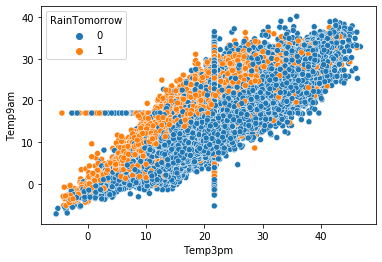

In [21]:
sns.scatterplot(x="Temp3pm", y="Temp9am", hue="RainTomorrow", data=data)

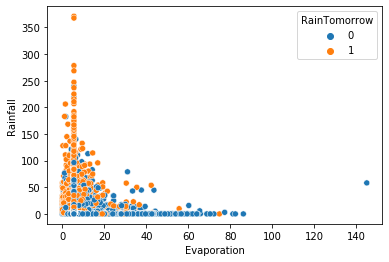

In [22]:
sns.scatterplot(x="Evaporation", y="Rainfall", hue="RainTomorrow", data=data)

### Applying the standard scalar

In [23]:
target = "RainTomorrow"
features = [i for i in data.columns if i!=target]

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[features]=sc.fit_transform(data[features])

### Spliting the data

In [25]:
# Splitting the dataset into train and test set with 80% in train and 20% in test to validate the model
train, test = train_test_split(data, test_size = 0.2, shuffle=True, random_state=42, stratify=data[target])

print(f'Shape of train dataset : {train.shape}') # getting train data shape
print(f'Shape of train dataset : {test.shape}') # getting test data shape

Shape of train dataset : (112629, 22)
Shape of train dataset : (28158, 22)


In [26]:
train[target].value_counts()

0    87668
1    24961
Name: RainTomorrow, dtype: int64

In [27]:
test[target].value_counts()

0    21918
1     6240
Name: RainTomorrow, dtype: int64

In [28]:
train_X = train[features]# taking the training data features
train_y=train[target]# output of our training data
test_X= test[features] # taking test data features
test_y =test[target]   #output value of test data

## Training

### Decision Tree Classifier

In [29]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Decision Tree Classifier is : {accuracy*100}%')

The accuracy of the Decision Tree Classifier is : 79.00419063853967%


### Random Forest Classifier 

In [30]:
model=RandomForestClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Random Forest Classifier is : {accuracy*100}%')

The accuracy of the Random Forest Classifier is : 84.78585126784573%


In [31]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Random Forest Classifier is : {accuracy*100}%')

The accuracy of the Random Forest Classifier is : 86.18509837346402%


## OBSERVATIONS

- **We trained the model with Decision tree classifier and Random Forest Classifier algorithms.**
- **Random Forest Classifier performed better than other models.**
- **We can observe that by changing the parameters and fine-tuning the models has improved the accuracy and performance of the model.**
- **We can even improve the model accuracy by performing the feature Engineering and create more features which helps model to differentiate the data.**